## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 5

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [3]:
# Read files
df_flights = pd.read_csv("data/flights.csv")

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [6]:
total_arr = df_flights[df_flights['arr_delay'] > 0]
arr_dep = total_arr[total_arr['dep_delay'] > 0]

late_arr_dep = arr_dep['dep_delay'].count()
arr_count = total_arr['arr_delay'].count()
percent_late_arr  = arr_dep['dep_delay'].count() / total_arr['arr_delay'].count()
percent_early_arr = 1 - late_arr_dep / arr_count

print('Total late arrivals: ',arr_count)
print('Late arrivals that departed late: ', late_arr_dep )
print('Percentage of late arrivals that departed late: ', percent_late_arr*100,'%')
print('Percentage of late arrivals that on time or early: ', percent_early_arr*100,'%')

Total late arrivals:  68433
Late arrivals that departed late:  48541
Percentage of late arrivals that departed late:  70.93215261642774 %
Percentage of late arrivals that on time or early:  29.067847383572254 %


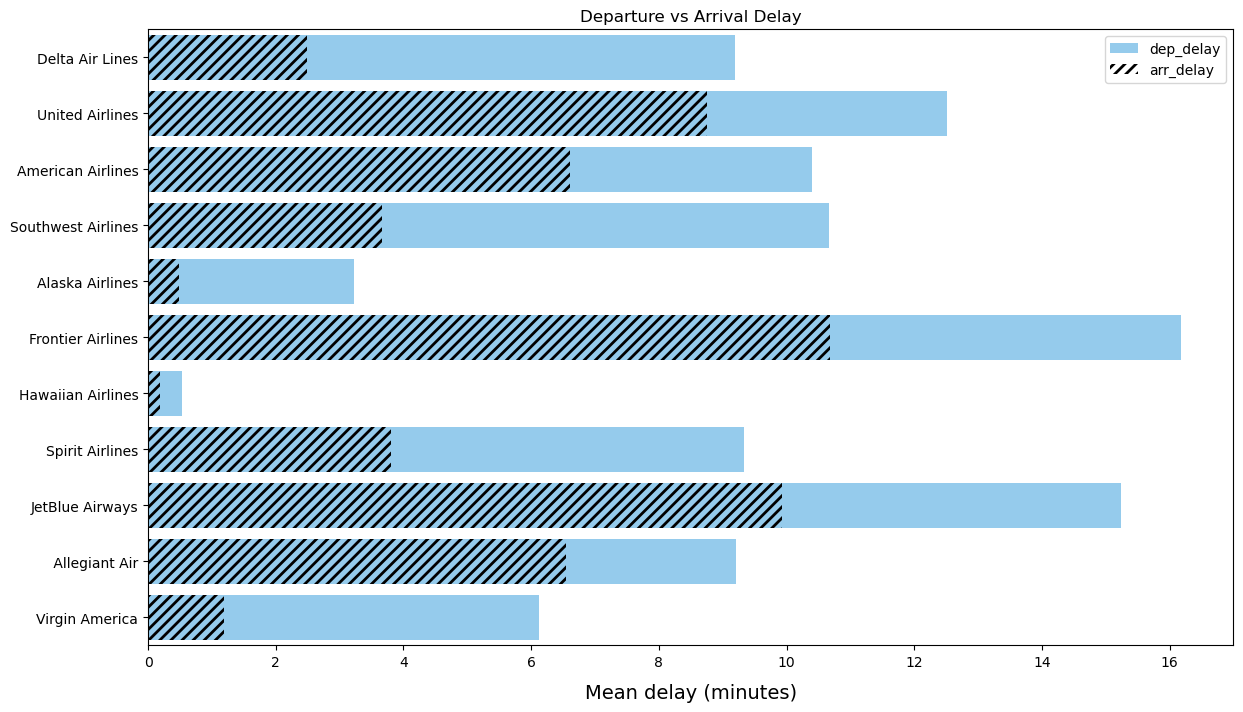

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(14,8))
ax = sns.barplot(x="dep_delay", y="mkt_carrier_name", label= 'dep_delay', data=df_flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="mkt_carrier_name", label= 'arr_delay', data=df_flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (minutes)', fontsize=14, labelpad=10);
ax.legend(loc='upper right')
plt.show()